## Machine learning Project : Air Quality Index (AQI) Prediction Using
# Machine Learning: 
# Implementing Decision Tree, SVM, and Linear Regression

#### Step 1: Load and Explore the Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  

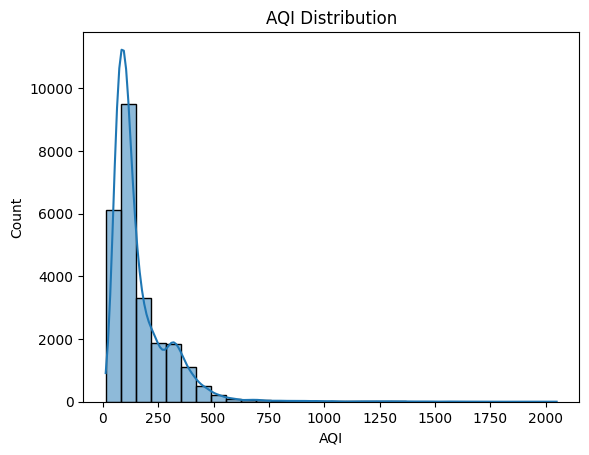

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "city_day.csv"  
df = pd.read_csv(file_path)

# Display basic info
print(df.info())

# Show first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Visualize AQI distribution
sns.histplot(df['AQI'].dropna(), bins=30, kde=True)
plt.title("AQI Distribution")
plt.show()


#### Step 2: Data Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select relevant columns (pollutants & AQI)
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'

# Drop rows where AQI is missing
df = df.dropna(subset=[target])

# Handle missing values in features using mean imputation
imputer = SimpleImputer(strategy="mean")
df[features] = imputer.fit_transform(df[features])

# Split data into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Step 3: Train Models
##### Decision Tree

In [4]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict AQI
y_pred_dt = dt_model.predict(X_test)


##### Support Vector Machine (SVM)

In [5]:
from sklearn.svm import SVR

# Train SVM model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

# Predict AQI
y_pred_svm = svm_model.predict(X_test)


##### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict AQI
y_pred_lr = lr_model.predict(X_test)


#### Step 4: Evaluate Model Performance

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R-squared (R²): {r2_score(y_test, y_pred):.2f}")
    print("-" * 50)

# Evaluate each model
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_lr, "Linear Regression")


Model: Decision Tree
Mean Absolute Error (MAE): 29.23
Root Mean Squared Error (RMSE): 60.77
R-squared (R²): 0.80
--------------------------------------------------
Model: SVM
Mean Absolute Error (MAE): 34.29
Root Mean Squared Error (RMSE): 79.45
R-squared (R²): 0.66
--------------------------------------------------
Model: Linear Regression
Mean Absolute Error (MAE): 31.20
Root Mean Squared Error (RMSE): 59.11
R-squared (R²): 0.81
--------------------------------------------------


#### Step 5: Compare the Models

In [8]:
from sklearn.metrics import explained_variance_score

# Collect results in a dictionary
results = {
    "Model": ["Decision Tree", "SVM", "Linear Regression"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_dt), 
        mean_absolute_error(y_test, y_pred_svm), 
        mean_absolute_error(y_test, y_pred_lr)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_dt)), 
        np.sqrt(mean_squared_error(y_test, y_pred_svm)), 
        np.sqrt(mean_squared_error(y_test, y_pred_lr))
    ],
    "R-squared (R²)": [
        r2_score(y_test, y_pred_dt), 
        r2_score(y_test, y_pred_svm), 
        r2_score(y_test, y_pred_lr)
    ],
    "Explained Variance Score (EVS)": [
        explained_variance_score(y_test, y_pred_dt),
        explained_variance_score(y_test, y_pred_svm),
        explained_variance_score(y_test, y_pred_lr)
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


               Model        MAE       RMSE  R-squared (R²)  \
0      Decision Tree  29.232144  60.766758        0.798340   
1                SVM  34.290083  79.454236        0.655236   
2  Linear Regression  31.203327  59.108362        0.809197   

   Explained Variance Score (EVS)  
0                        0.798417  
1                        0.659620  
2                        0.809342  
